# Обучим gpt2 на данных

In [1]:
from transformers import GPT2Tokenizer, TFGPT2Model
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

In [2]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [3]:
device = 'cpu' if not torch.cuda.is_available() else 'cuda:6'
device

'cuda:6'

In [4]:
model = AutoModelForCausalLM.from_pretrained("gpt2", torch_dtype=torch.float16)
model.to(device)

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [5]:
tokenizer = AutoTokenizer.from_pretrained("gpt2")

In [6]:
prompt = "Hello, tell me how reconstruct you for predict volume on defu crypto market"

In [7]:
model_inputs = tokenizer([prompt], return_tensors="pt").to(device)

In [8]:
generated_ids = model.generate(**model_inputs, max_new_tokens=1000, do_sample=True)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [9]:
print(tokenizer.batch_decode(generated_ids)[0])

Hello, tell me how reconstruct you for predict volume on defu crypto market, how you're going to help us get bitcoin. And if you're curious, the answer is that I understand.

It's just a question of finding a solution.

So here we are: a cryptographic protocol which could make it possible to create volumes of transaction data on blockchains.

Basically, if there is a large volume of traffic on this network, such as a few million transactions per day.

The reason is that if you give us a single transaction, then you will find that there is a probability that some people will try to buy the entire block.

So that doesn't tell us very much about the actual transactions in blockchains.

So, what we are concerned with is generating a volume of transactions from a small number of people on the network, and having them fill in what their value of bitcoin would be.

We want our volume to be smaller than that of bitcoin and to be less like bitcoin if you will.

That is, we want the volume to be

# Testing crio
 

In [10]:
import pandas as pd
import numpy as np
import json
import typing as tp
from tqdm.notebook import tqdm
from plotly_resampler import FigureResampler

In [11]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split

In [12]:
import Code.Dataloader as DataloaderLib
import Code.Logger as LogsLib
import Code.Dataset as DatasetLib
import Code.ModelBertV1 as ModelLib
import Code.Train as TrainLib

%load_ext autoreload
%autoreload 2

import importlib
importlib.reload(DataloaderLib)
importlib.reload(DatasetLib)
importlib.reload(LogsLib)
importlib.reload(ModelLib)
importlib.reload(TrainLib)

import Code.Dataloader as DataloaderLib
import Code.Logger as LogsLib
import Code.Dataset as DatasetLib
import Code.ModelBertV1 as ModelLib
import Code.Train as TrainLib

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
# start_ind = int(1e7)
# transactions = DataloaderLib.GetTransactionsByInd(range(start_ind, start_ind + 150), logger_fake='logger_loader')

In [15]:
# last_ind = int(2e7 + 1e6)
# size = 100
# transactions = DataloaderLib.GetTransactionsByInd(range(last_ind, last_ind - size, -1), logger_fake='logger_loader')
# df_to_for_predict = transactions.loc[:, DataloaderLib.useful_columns]

In [16]:
# last_ind = int(2e7 + 1e6)
# size = 4000
# transactions = DataloaderLib.GetTransactionsByInd(range(last_ind, last_ind - size, -1), logger_fake='logger_loader')
# df_to_for_predict = transactions.loc[:, DataloaderLib.useful_columns]

In [17]:
# last_ind = int(2e7 + 1e6)
# size = 6000
# transactions = DataloaderLib.GetTransactionsByInd(range(last_ind, last_ind - size, -1), logger_fake='logger_loader')
# dataset = transactions.loc[:, DataloaderLib.useful_columns]

In [18]:
# %%time
cnt_trades = 500_000
# cnt_trades = 30
df_raw = DataloaderLib.DatasetTimeBoomAuthorDependence(cnt_trades, count_people=20, cnt_boom=cnt_trades // 100, sigma=10000)

  0%|          | 0/5000 [00:00<?, ?it/s]

Write at logger: logs/logs_116.log


In [19]:
FigureResampler(px.line(x=df_raw.timestamp, y=df_raw.value, line_shape='hv'))

In [20]:
(df_raw.value - df_raw.value.mean()).std(), (df_raw.value - df_raw.value.mean()).std() ** 2

(np.float64(4.018915283173273), np.float64(16.15168005332371))

In [21]:
df_raw = DataloaderLib.SimpleDataloader(500_000, count_people=10)
df_to_for_predict = df_raw

Write at logger: logs/logs_117.log


In [22]:
train_dataset, val_dataset = train_test_split(df_raw, test_size=1/4)

In [23]:
train_dataset.shape, val_dataset.shape

((375000, 4), (125000, 4))

# Смотрим на датасет

In [24]:
df_to_for_predict

,from,to,value,timestamp
0,6,8,0,2.282878
1,3,5,1,3.364973
2,7,1,1,5.204858
3,4,8,1,8.015318
4,6,0,0,9.383892
...,...,...,...,...
499995,3,6,1,999382.992811
499996,0,3,0,999385.580016
499997,8,6,1,999388.141624
499998,7,2,1,999390.39277


In [25]:
df_to_for_predict.head(5)

,from,to,value,timestamp
0,6,8,0,2.282878
1,3,5,1,3.364973
2,7,1,1,5.204858
3,4,8,1,8.015318
4,6,0,0,9.383892


In [26]:
len(df_to_for_predict['from'].value_counts())

10

In [27]:
# df_to_for_predict['to'].value_counts()[1038152369971993893212000844348416056966454179089]

In [28]:
# df_to_for_predict.groupby('from').value.mean()[1038152369971993893212000844348416056966454179089]

In [29]:
mean_sell = df_to_for_predict.groupby('from').value.mean()

In [30]:
top_sellers = df_to_for_predict['from'].value_counts().keys().sort_values()
top_sellers

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='object', name='from')

In [31]:
top_sellers

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='object', name='from')

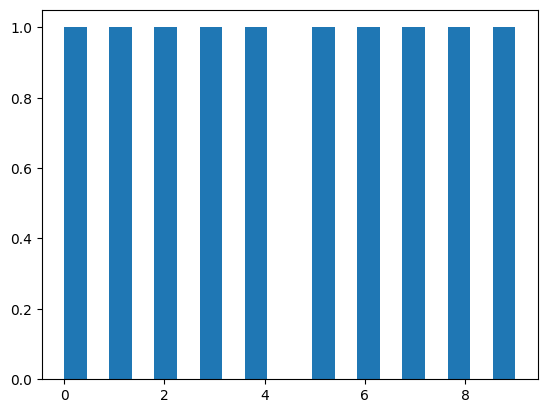

In [32]:
plt.hist(top_sellers[top_sellers < 20], bins=20);

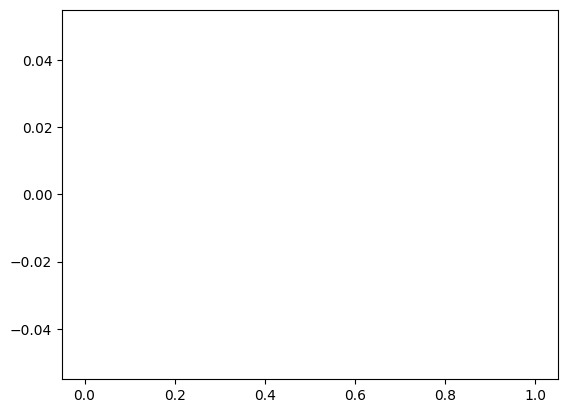

In [33]:
plt.hist(top_sellers[(top_sellers > 20) & (top_sellers <= 100)], bins=40);

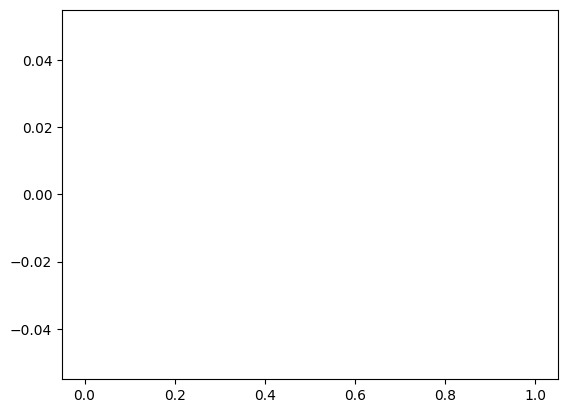

In [34]:
plt.hist(top_sellers[top_sellers > 100], bins=50);

In [35]:
# pd.DataFrame(
#     [df_to_for_predict.loc[df_to_for_predict['from'] == ind, 'value'].describe().values.reshape(8) for ind in top_sellers],
#     index=top_sellers,
#     columns=df_to_for_predict.loc[df_to_for_predict['from'] == top_sellers[0], 'value'].describe().index
#     )


# Bert!!!

In [36]:
import datetime
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from transformers import BertConfig, BertModel
import numpy as np

In [37]:
cnt_known_address = int(1e3)
known_address = pd.concat([df_to_for_predict['to'], df_to_for_predict['from']]).value_counts()[:cnt_known_address].keys().sort_values()

In [38]:
known_address

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='object')

In [39]:
df_raw

,from,to,value,timestamp
0,6,8,0,2.282878
1,3,5,1,3.364973
2,7,1,1,5.204858
3,4,8,1,8.015318
4,6,0,0,9.383892
...,...,...,...,...
499995,3,6,1,999382.992811
499996,0,3,0,999385.580016
499997,8,6,1,999388.141624
499998,7,2,1,999390.39277


In [40]:
dataset = DatasetLib.TransactionDataset(df_raw, list(known_address), 100)
for name, value in dataset[0].items():
    print(f"{name}: {value.shape}")

numeric_features: torch.Size([100, 1])
from_address: torch.Size([100])
to_address: torch.Size([100])
time_features: torch.Size([100, 3])
value: torch.Size([100])


/home/motatasher/Documents/University/Diploma/Diploma/Code/Dataset.py:49: UserWarning:

The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3725.)



In [67]:
model = ModelLib.BertForTransactionRegressionV1(len(known_address), 64).to(device)

In [68]:
dataset_params = dict(
    known_address = list(known_address),
    sample_len = 100,
)

In [70]:
train_dataloader = torch.utils.data.DataLoader(
    DatasetLib.TransactionDataset(train_dataset, **dataset_params),
    batch_size=64,
    shuffle=True,
    num_workers=0)

val_dataloader = torch.utils.data.DataLoader(
    DatasetLib.TransactionDataset(val_dataset, **dataset_params),
    batch_size=32,
    shuffle=True,
    num_workers=0)

In [71]:
# TrainLib.train_model(model, model_predictor=TrainLib.scalar_dot_predictor, train_loader=train_dataloader,
#                      val_loader=val_dataloader, num_epochs=1000, learning_rate=3e-7,
#                      start_epoch=0, gamma=0.8, step_size=10, device=device, warmup_epochs=1)

In [76]:
TrainLib.train_model(model, TrainLib.time_cross_predictior, train_dataloader, result_loss=TrainLib.result_loss_slower_change,
                     val_loader=val_dataloader, num_epochs=1000, learning_rate=3e-7, start_epoch=0, gamma=0.8, step_size=10, device=device,
                     time_coef_loss=1/32)

Epoch [683/1000]
Train Loss: 0.8894
Test Loss: 0.8975
lr: [2.3539131507700135e-13]


  0%|          | 0/59 [00:00<?, ?it/s]

In [69]:
TrainLib.train_model(model, TrainLib.scalar_dot_predictor, train_dataloader,
                     val_dataloader, 1000, 3e-7, start_epoch=0, gamma=0.8, step_size=10, device=device)

Epoch [217/1000], Train Loss: 1.0212, Test Loss: 1.0165


  0%|          | 0/59 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f98517e3d80>
Traceback (most recent call last):
  File "/home/motatasher/miniconda3/envs/DiplomaIsupov/lib/python3.12/site-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/home/motatasher/miniconda3/envs/DiplomaIsupov/lib/python3.12/site-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/home/motatasher/miniconda3/envs/DiplomaIsupov/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f98517e3d80>
Traceback (most recent call last):
  File "/home/motatasher/miniconda3/envs/DiplomaIsupov/lib/python3.12/site-packages/torch/utils/data/datal

# Задачи

## Model

- задать веса для эмбедингов внутри модели
- написать модель предсказывающую временной эмбединг, который должен не сильно меняться
- поиграть с размером окна/разбитием на окна по метапараметрам (воле/чему-то ещё)
- попробовать модель = один слой атеншена


## Данные

- наладить процесс скачивания
- узнать таки, за какие даты у меня данные 
- а что с генерацией можно ещё придумать???
- нагенерировать идей для генерации